<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>RNNs for Timeseries Analysis</h1>
        <h2>Timeseries</h2>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import numpy as np
np.random.seed(123)

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -p numpy,matplotlib,pandas,sklearn

Wed Sep 25 2019 

CPython 3.7.3
IPython 6.2.1

numpy 1.16.2
matplotlib 3.1.0
pandas 0.24.2
sklearn 0.20.3

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


# Load the dataset
GDP data from the Federal Reserve Bank [website](https://fred.stlouisfed.org/series/GDP)

In [3]:
series = pd.read_csv('data/GDP.csv', header=0, parse_dates=[0], index_col=0)

/Users/bgoncalves/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


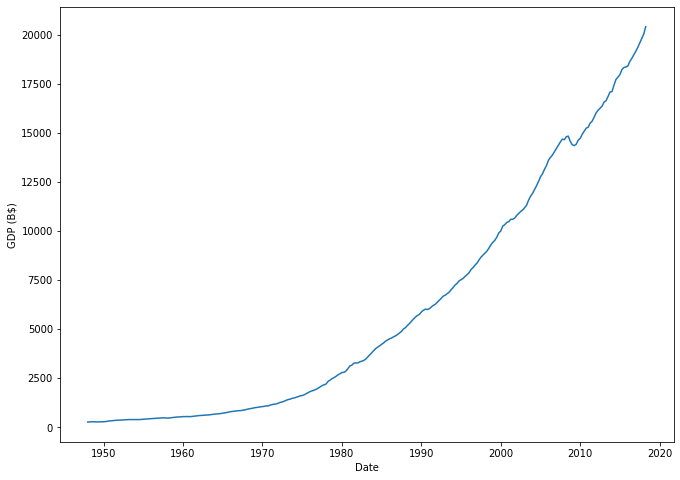

In [4]:
plt.plot(series)
plt.xlabel('Date')
plt.ylabel('GDP (B$)');
plt.gcf().set_size_inches(11,8)

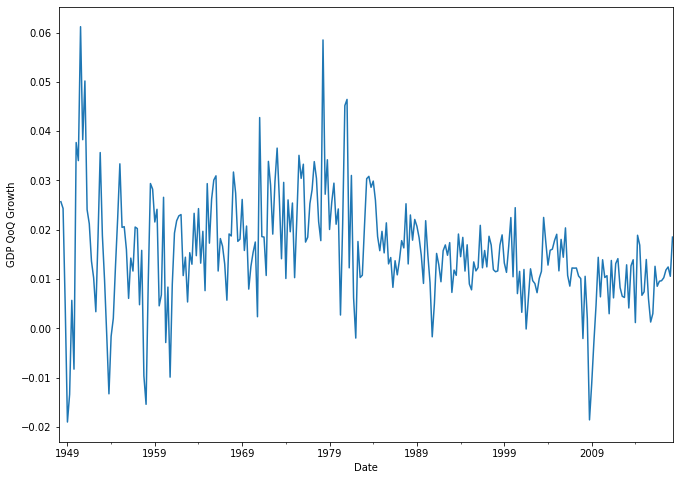

In [5]:
series['GDP'].pct_change().plot()
plt.gca().plot([series.index.min(), series.index.max()], [0, 0], 'r-')
plt.xlabel('Date')
plt.ylabel('GDP QoQ Growth');
plt.gcf().set_size_inches(11,8)

## Autocorrelation function

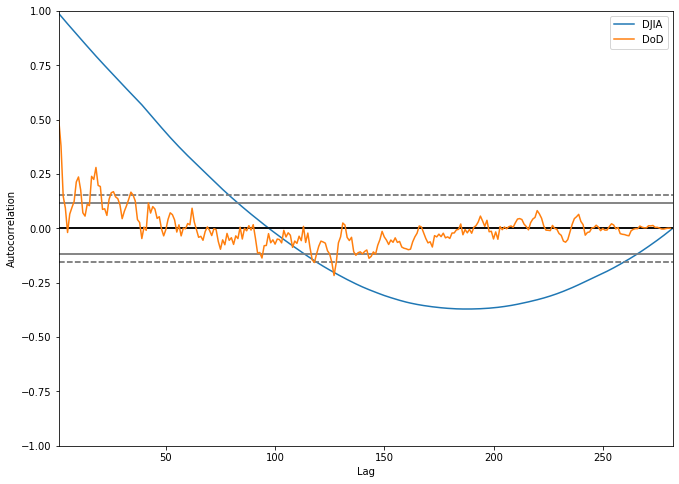

In [6]:
autocorrelation_plot(series, label='DJIA')
autocorrelation_plot(series.pct_change().dropna(), ax=plt.gca(), label='DoD')
plt.gcf().set_size_inches(11,8)

In [7]:
values = series.pct_change().dropna().values.reshape(-1, 1)
X = values[:-1]
y = values[1:]

Text(0, 0.5, 'x_t+1')

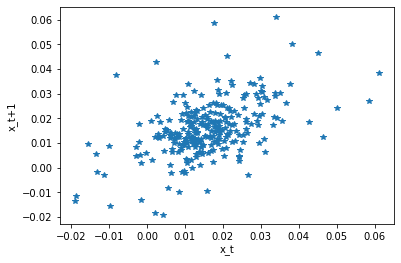

In [8]:
plt.plot(X.flatten(), y, '*')
plt.xlabel('x_t')
plt.ylabel('x_t+1')

In [9]:
lm = LinearRegression()

In [10]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
y_pred = lm.predict(X)

## Fit comparison

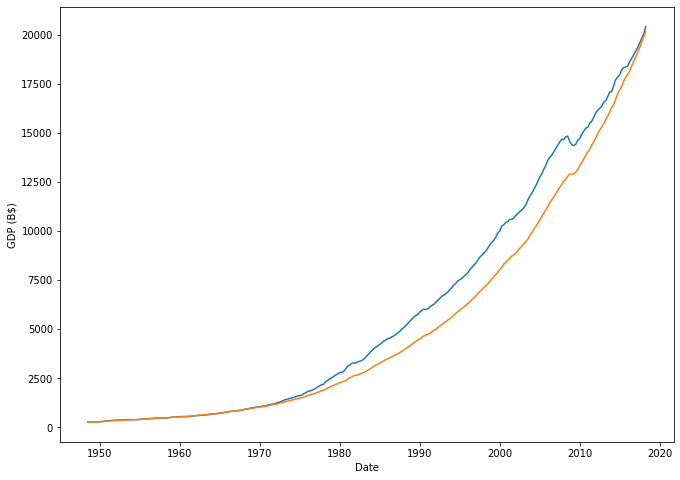

In [12]:
plt.plot(series.index[2:], series.values[2:], )
plt.plot(series.index[2:], (1+y_pred).cumprod()*series.values[0])
plt.xlabel('Date')
plt.ylabel('GDP (B$)')
plt.gcf().set_size_inches(11, 8)

## Now without looking into the future

In [13]:
n_points = len(series)
train_points = int(2/3*n_points)+1

In [14]:
X_train = X[:train_points]
y_train = y[:train_points]
X_test = X[train_points:]
y_test = y[train_points:]

In [15]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

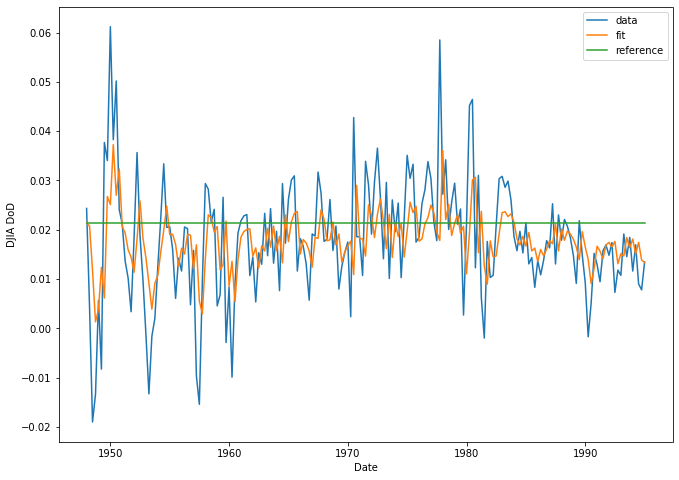

In [17]:
plt.plot(series.index[:train_points], y_train, label='data')
plt.plot(series.index[:train_points], y_train_pred, label='fit')
plt.plot(series.index[:train_points], y_train_pred*0+y_train_pred[0], label='reference')
plt.xlabel('Date')
plt.ylabel('DJIA DoD')
plt.legend()
plt.gcf().set_size_inches(11, 8)

## Comparison plot

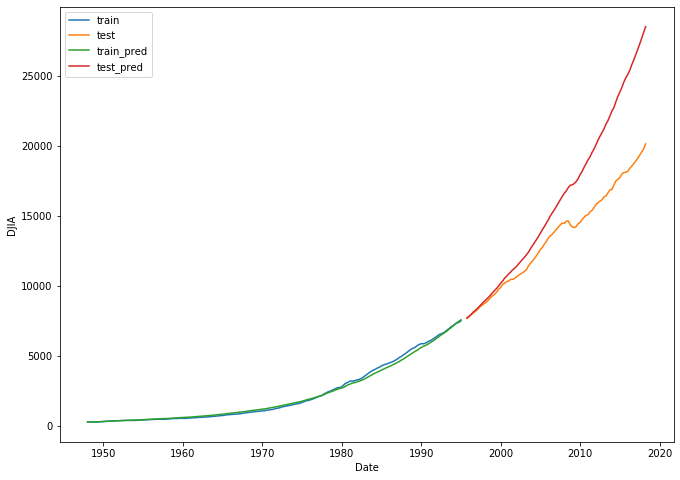

In [18]:
plt.plot(series.index[:train_points], (1+y_train).cumprod()*series.values[0], label='train')
plt.plot(series.index[train_points+2:], (1+y_test).cumprod()*series.values[train_points], label='test')
plt.plot(series.index[:train_points], (1+y_train_pred).cumprod()*series.values[0], label='train_pred')
plt.plot(series.index[train_points+2:], (1+y_test_pred).cumprod()*series.values[train_points], label='test_pred')
plt.xlabel('Date')
plt.ylabel('DJIA')
plt.legend()
plt.gcf().set_size_inches(11,8)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>